# Doctor Consultation Fee Project

### Problem statement:- We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. Build a model to predict the doctor’s consulting fee

Importing the important libraries for data reading and cleaning.

In [254]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Loading both the train and test data.

In [255]:
df_train=pd.read_excel('Final_Train.xlsx')

In [256]:
df_test=pd.read_excel('Final_Test.xlsx')

In [257]:
df_train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


Train data has 5961 rows and 7 columns.

In [258]:
df_test

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


Test data has 1987 rows and 6 columns

In [259]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [260]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


All the data types is object type except fees

There is lot of data preprocessing required. Hence we will merge both the data files and later split it

In [261]:
df=df_train.append(df_test, sort="False") #sorting is false that means the last 1987 rows will have test data

In [262]:
df

,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating
0,24 years experience,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100%
1,12 years experience,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98%
2,9 years experience,300.0,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",NaN
3,12 years experience,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",NaN
4,20 years experience,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",Ayurveda,BAMS,100%
...,...,...,...,...,...,...,...
1982,10 years experience,NaN,NaN,"Basavanagudi, Bangalore",Ayurveda,"BAMS, Doctor of Medicine",NaN
1983,4 years experience,NaN,NaN,"Choolai, Chennai",Dermatologists,"MD - Dermatology , Venereology & Leprosy, MBBS",NaN
1984,9 years experience,NaN,NaN,"Porur, Chennai",General Medicine,"MBBS, MD / MS - Obstetrics & Gynaecology",NaN
1985,12 years experience,NaN,RCT - Root Canal Treatment Root Canal Treatmen...,"Arekere, Bangalore",Dentist,BDS,98%


We now have 7948 rows and 7 columns

Lets check the value counts of each feature

In [263]:
df.Experience.value_counts()

9 years experience     419
10 years experience    404
8 years experience     380
11 years experience    374
12 years experience    358
                      ... 
66 years experience      1
64 years experience      1
60 years experience      1
61 years experience      1
58 years experience      1
Name: Experience, Length: 64, dtype: int64

This is a string data. Since I want all the years I will keep only the numbers from the column.

In [264]:
df.isnull().sum()

Experience               0
Fees                  1987
Miscellaneous_Info    3454
Place                   31
Profile                  0
Qualification            0
Rating                4392
dtype: int64

We dont have null values in Experince hence we will create the new column only with the number of years for experience.

In [265]:
new = df["Experience"].str.split(" ", n = 1, expand = True)

In [266]:
# making separate exp column from new data frame
df["Exp"]= new[0]

In [267]:
df

,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating,Exp
0,24 years experience,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100%,24
1,12 years experience,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98%,12
2,9 years experience,300.0,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",NaN,9
3,12 years experience,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",NaN,12
4,20 years experience,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",Ayurveda,BAMS,100%,20
...,...,...,...,...,...,...,...,...
1982,10 years experience,NaN,NaN,"Basavanagudi, Bangalore",Ayurveda,"BAMS, Doctor of Medicine",NaN,10
1983,4 years experience,NaN,NaN,"Choolai, Chennai",Dermatologists,"MD - Dermatology , Venereology & Leprosy, MBBS",NaN,4
1984,9 years experience,NaN,NaN,"Porur, Chennai",General Medicine,"MBBS, MD / MS - Obstetrics & Gynaecology",NaN,9
1985,12 years experience,NaN,RCT - Root Canal Treatment Root Canal Treatmen...,"Arekere, Bangalore",Dentist,BDS,98%,12


Now we will drop the experience column

In [268]:
df.drop(['Experience'],axis=1,inplace=True)

In [269]:
df

,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating,Exp
0,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100%,24
1,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98%,12
2,300.0,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",NaN,9
3,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",NaN,12
4,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",Ayurveda,BAMS,100%,20
...,...,...,...,...,...,...,...
1982,NaN,NaN,"Basavanagudi, Bangalore",Ayurveda,"BAMS, Doctor of Medicine",NaN,10
1983,NaN,NaN,"Choolai, Chennai",Dermatologists,"MD - Dermatology , Venereology & Leprosy, MBBS",NaN,4
1984,NaN,NaN,"Porur, Chennai",General Medicine,"MBBS, MD / MS - Obstetrics & Gynaecology",NaN,9
1985,NaN,RCT - Root Canal Treatment Root Canal Treatmen...,"Arekere, Bangalore",Dentist,BDS,98%,12


In [270]:
df.Place.value_counts()

Andheri West, Mumbai             97
HSR Layout, Bangalore            97
Dwarka, Delhi                    93
Banjara Hills, Hyderabad         85
Mulund West, Mumbai              81
                                 ..
Jeevan Park, Delhi                1
Vasant Enclave, Delhi             1
Poojapura, Thiruvananthapuram     1
JP Nagar 8 Phase, Bangalore       1
Kilokri, Delhi                    1
Name: Place, Length: 948, dtype: int64

We will be seperating only the city from the Place but before doing that we will fill the NaN values with mode.

In [271]:
df['Place'] = df['Place'].fillna(df['Place'].mode()[0])

We will now create the columns as City and Area from Place.

In [272]:
df['Area']=df.Place.str.split(',').str[0]
df['City']=df.Place.str.split(',').str[1]

In [273]:
df

,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating,Exp,Area,City
0,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100%,24,Kakkanad,Ernakulam
1,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98%,12,Whitefield,Bangalore
2,300.0,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",NaN,9,Mathikere - BEL,Bangalore
3,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",NaN,12,Bannerghatta Road,Bangalore
4,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",Ayurveda,BAMS,100%,20,Keelkattalai,Chennai
...,...,...,...,...,...,...,...,...,...
1982,NaN,NaN,"Basavanagudi, Bangalore",Ayurveda,"BAMS, Doctor of Medicine",NaN,10,Basavanagudi,Bangalore
1983,NaN,NaN,"Choolai, Chennai",Dermatologists,"MD - Dermatology , Venereology & Leprosy, MBBS",NaN,4,Choolai,Chennai
1984,NaN,NaN,"Porur, Chennai",General Medicine,"MBBS, MD / MS - Obstetrics & Gynaecology",NaN,9,Porur,Chennai
1985,NaN,RCT - Root Canal Treatment Root Canal Treatmen...,"Arekere, Bangalore",Dentist,BDS,98%,12,Arekere,Bangalore


In [274]:
df.City.unique()

array([' Ernakulam', ' Bangalore', ' Chennai', ' Delhi', ' Hyderabad',
       ' Coimbatore', ' Mumbai', ' Thiruvananthapuram', ' Sector 5', nan],
      dtype=object)

In [275]:
df['City'] = df['City'].fillna(df['City'].mode()[0])

In [276]:
df.City.unique()

array([' Ernakulam', ' Bangalore', ' Chennai', ' Delhi', ' Hyderabad',
       ' Coimbatore', ' Mumbai', ' Thiruvananthapuram', ' Sector 5'],
      dtype=object)

In [277]:
df.Area.isnull().sum()

0

We will now drop the column Place as we have derived the city from it.

In [278]:
df.drop(['Place'],axis=1,inplace=True)

In [279]:
df

,Fees,Miscellaneous_Info,Profile,Qualification,Rating,Exp,Area,City
0,100.0,"100% 16 Feedback Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100%,24,Kakkanad,Ernakulam
1,350.0,"98% 76 Feedback Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98%,12,Whitefield,Bangalore
2,300.0,NaN,ENT Specialist,"MBBS, MS - Otorhinolaryngology",NaN,9,Mathikere - BEL,Bangalore
3,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...",Ayurveda,"BSc - Zoology, BAMS",NaN,12,Bannerghatta Road,Bangalore
4,250.0,"100% 4 Feedback Keelkattalai, Chennai",Ayurveda,BAMS,100%,20,Keelkattalai,Chennai
...,...,...,...,...,...,...,...,...
1982,NaN,NaN,Ayurveda,"BAMS, Doctor of Medicine",NaN,10,Basavanagudi,Bangalore
1983,NaN,NaN,Dermatologists,"MD - Dermatology , Venereology & Leprosy, MBBS",NaN,4,Choolai,Chennai
1984,NaN,NaN,General Medicine,"MBBS, MD / MS - Obstetrics & Gynaecology",NaN,9,Porur,Chennai
1985,NaN,RCT - Root Canal Treatment Root Canal Treatmen...,Dentist,BDS,98%,12,Arekere,Bangalore


In [280]:
df.Profile.unique()

array(['Homeopath', 'Ayurveda', 'ENT Specialist', 'Dentist',
       'General Medicine', 'Dermatologists'], dtype=object)

In [281]:
df.Qualification.unique()

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ...,
       'MD - Medicine, Post Graduate Diploma in Diabetology (PGDD), MBBS, FRCP - Internal Medicine',
       'MBBS, MS - General Surgery, FAIS, FIAGES',
       'MBBS, MD / MS - Obstetrics & Gynaecology'], dtype=object)

Doctors generally have many degree. Hence we need to seperate all the degree into different column.

In [282]:
df['Degree1']=df.Qualification.str.split(',').str[0]
df['Degree2']=df.Qualification.str.split(',').str[1]
df['Degree3']=df.Qualification.str.split(',').str[2]

In [283]:
df

,Fees,Miscellaneous_Info,Profile,Qualification,Rating,Exp,Area,City,Degree1,Degree2,Degree3
0,100.0,"100% 16 Feedback Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100%,24,Kakkanad,Ernakulam,BHMS,MD - Homeopathy,NaN
1,350.0,"98% 76 Feedback Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98%,12,Whitefield,Bangalore,BAMS,MD - Ayurveda Medicine,NaN
2,300.0,NaN,ENT Specialist,"MBBS, MS - Otorhinolaryngology",NaN,9,Mathikere - BEL,Bangalore,MBBS,MS - Otorhinolaryngology,NaN
3,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...",Ayurveda,"BSc - Zoology, BAMS",NaN,12,Bannerghatta Road,Bangalore,BSc - Zoology,BAMS,NaN
4,250.0,"100% 4 Feedback Keelkattalai, Chennai",Ayurveda,BAMS,100%,20,Keelkattalai,Chennai,BAMS,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1982,NaN,NaN,Ayurveda,"BAMS, Doctor of Medicine",NaN,10,Basavanagudi,Bangalore,BAMS,Doctor of Medicine,NaN
1983,NaN,NaN,Dermatologists,"MD - Dermatology , Venereology & Leprosy, MBBS",NaN,4,Choolai,Chennai,MD - Dermatology,Venereology & Leprosy,MBBS
1984,NaN,NaN,General Medicine,"MBBS, MD / MS - Obstetrics & Gynaecology",NaN,9,Porur,Chennai,MBBS,MD / MS - Obstetrics & Gynaecology,NaN
1985,NaN,RCT - Root Canal Treatment Root Canal Treatmen...,Dentist,BDS,98%,12,Arekere,Bangalore,BDS,NaN,NaN


In [284]:
df['Degree3'].isnull().sum()

6088

In [285]:
df['Degree2'].isnull().sum()

2571

There are many null values in Degree 3 hance we will drop the same along with Qualification

In [286]:
df.drop(['Qualification','Degree3'],axis=1,inplace=True)

We will fill the Null values in Degree 2 with 'Others'

In [287]:
df.Degree2.fillna("Others",inplace=True)

In [288]:
df

,Fees,Miscellaneous_Info,Profile,Rating,Exp,Area,City,Degree1,Degree2
0,100.0,"100% 16 Feedback Kakkanad, Ernakulam",Homeopath,100%,24,Kakkanad,Ernakulam,BHMS,MD - Homeopathy
1,350.0,"98% 76 Feedback Whitefield, Bangalore",Ayurveda,98%,12,Whitefield,Bangalore,BAMS,MD - Ayurveda Medicine
2,300.0,NaN,ENT Specialist,NaN,9,Mathikere - BEL,Bangalore,MBBS,MS - Otorhinolaryngology
3,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...",Ayurveda,NaN,12,Bannerghatta Road,Bangalore,BSc - Zoology,BAMS
4,250.0,"100% 4 Feedback Keelkattalai, Chennai",Ayurveda,100%,20,Keelkattalai,Chennai,BAMS,Others
...,...,...,...,...,...,...,...,...,...
1982,NaN,NaN,Ayurveda,NaN,10,Basavanagudi,Bangalore,BAMS,Doctor of Medicine
1983,NaN,NaN,Dermatologists,NaN,4,Choolai,Chennai,MD - Dermatology,Venereology & Leprosy
1984,NaN,NaN,General Medicine,NaN,9,Porur,Chennai,MBBS,MD / MS - Obstetrics & Gynaecology
1985,NaN,RCT - Root Canal Treatment Root Canal Treatmen...,Dentist,98%,12,Arekere,Bangalore,BDS,Others


In [289]:
df.Miscellaneous_Info.unique()

array(['100% 16 Feedback Kakkanad, Ernakulam',
       '98% 76 Feedback Whitefield, Bangalore', nan, ...,
       'General Dentistry Dental Fillings RCT - Single Sitting',
       '98% 240 Feedback Velachery, Chennai',
       'RCT - Root Canal Treatment Root Canal Treatment - Rotary Pyorrhoea Treatment'],
      dtype=object)

I will drop the Miscellaneous info columns as this info is mostly regarding the rating and city. We already have 2 columns for the same.

In [290]:
df.drop(['Miscellaneous_Info'],axis=1,inplace=True)

In [291]:
df

,Fees,Profile,Rating,Exp,Area,City,Degree1,Degree2
0,100.0,Homeopath,100%,24,Kakkanad,Ernakulam,BHMS,MD - Homeopathy
1,350.0,Ayurveda,98%,12,Whitefield,Bangalore,BAMS,MD - Ayurveda Medicine
2,300.0,ENT Specialist,NaN,9,Mathikere - BEL,Bangalore,MBBS,MS - Otorhinolaryngology
3,250.0,Ayurveda,NaN,12,Bannerghatta Road,Bangalore,BSc - Zoology,BAMS
4,250.0,Ayurveda,100%,20,Keelkattalai,Chennai,BAMS,Others
...,...,...,...,...,...,...,...,...
1982,NaN,Ayurveda,NaN,10,Basavanagudi,Bangalore,BAMS,Doctor of Medicine
1983,NaN,Dermatologists,NaN,4,Choolai,Chennai,MD - Dermatology,Venereology & Leprosy
1984,NaN,General Medicine,NaN,9,Porur,Chennai,MBBS,MD / MS - Obstetrics & Gynaecology
1985,NaN,Dentist,98%,12,Arekere,Bangalore,BDS,Others


This is our re constructed dataframe.

In [292]:
df.isnull().sum()

Fees       1987
Profile       0
Rating     4392
Exp           0
Area          0
City          0
Degree1       0
Degree2       0
dtype: int64

In [293]:
df.Rating.unique()

array(['100%', '98%', nan, '99%', '79%', '95%', '97%', '94%', '88%',
       '90%', '80%', '93%', '36%', '78%', '87%', '96%', '82%', '89%',
       '74%', '86%', '92%', '83%', '76%', '85%', '56%', '91%', '68%',
       '60%', '75%', '69%', '73%', '67%', '77%', '33%', '55%', '71%',
       '84%', '45%', '63%', '72%', '81%', '62%', '57%', '7%', '48%',
       '40%', '70%', '64%', '65%', '47%', '58%', '53%', '52%'],
      dtype=object)

We will fill the null values of rating with mode.

In [294]:
df['Rating'] = df['Rating'].fillna(df['Rating'].mode()[0])

In [295]:
df.isnull().sum()

Fees       1987
Profile       0
Rating        0
Exp           0
Area          0
City          0
Degree1       0
Degree2       0
dtype: int64

The null values in fees is the one which we need to predict. Hence we will not remove it.

In [296]:
df['Ratings']=df.Rating.str.split("%").str[0]

In [297]:
df.drop(['Rating'],axis=1,inplace=True)

In [298]:
df

,Fees,Profile,Exp,Area,City,Degree1,Degree2,Ratings
0,100.0,Homeopath,24,Kakkanad,Ernakulam,BHMS,MD - Homeopathy,100
1,350.0,Ayurveda,12,Whitefield,Bangalore,BAMS,MD - Ayurveda Medicine,98
2,300.0,ENT Specialist,9,Mathikere - BEL,Bangalore,MBBS,MS - Otorhinolaryngology,100
3,250.0,Ayurveda,12,Bannerghatta Road,Bangalore,BSc - Zoology,BAMS,100
4,250.0,Ayurveda,20,Keelkattalai,Chennai,BAMS,Others,100
...,...,...,...,...,...,...,...,...
1982,NaN,Ayurveda,10,Basavanagudi,Bangalore,BAMS,Doctor of Medicine,100
1983,NaN,Dermatologists,4,Choolai,Chennai,MD - Dermatology,Venereology & Leprosy,100
1984,NaN,General Medicine,9,Porur,Chennai,MBBS,MD / MS - Obstetrics & Gynaecology,100
1985,NaN,Dentist,12,Arekere,Bangalore,BDS,Others,98


In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7948 entries, 0 to 1986
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Fees     5961 non-null   float64
 1   Profile  7948 non-null   object 
 2   Exp      7948 non-null   object 
 3   Area     7948 non-null   object 
 4   City     7948 non-null   object 
 5   Degree1  7948 non-null   object 
 6   Degree2  7948 non-null   object 
 7   Ratings  7948 non-null   object 
dtypes: float64(1), object(7)
memory usage: 558.8+ KB


Exp and Ratings are still showing as object type hence we will change it to int data type

In [300]:
df['Ratings']=df['Ratings'].astype(int)
df['Exp']=df['Exp'].astype(int)

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7948 entries, 0 to 1986
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Fees     5961 non-null   float64
 1   Profile  7948 non-null   object 
 2   Exp      7948 non-null   int32  
 3   Area     7948 non-null   object 
 4   City     7948 non-null   object 
 5   Degree1  7948 non-null   object 
 6   Degree2  7948 non-null   object 
 7   Ratings  7948 non-null   int32  
dtypes: float64(1), int32(2), object(5)
memory usage: 496.8+ KB


Its done!!

Lets check the stastical summary of the data

In [302]:
df.describe()

,Fees,Exp,Ratings
count,5961.000000,7948.000000,7948.000000
mean,307.944640,17.446653,97.580649
std,190.920373,11.201217,5.859426
min,5.000000,0.000000,7.000000
25%,150.000000,9.000000,98.000000
50%,300.000000,15.000000,100.000000
75%,500.000000,23.000000,100.000000
max,950.000000,66.000000,100.000000


1. Fees is 5 minumum and 950 max. 5 rupees is difficult to explain but it seems like an error.
2. Mean is greater than median for Fees and Exp. Hence the data is positively skewed.
3. Standard deviation for fees is very high that means data is spreaded.
4. Exp is showing min as 0. Could be for the new doctor who has just started the consultation.

In [303]:
df.loc[df['Fees']<=5]

,Fees,Profile,Exp,Area,City,Degree1,Degree2,Ratings
1930,5.0,Dentist,6,TV Medical College,Thiruvananthapuram,BDS,Others,100


I will replace this with mean 307

In [304]:
df["Fees"].replace({5: 307}, inplace=True)

In [305]:
df.loc[df['Fees']<=5]

,Fees,Profile,Exp,Area,City,Degree1,Degree2,Ratings


Done!!!

### Visualization

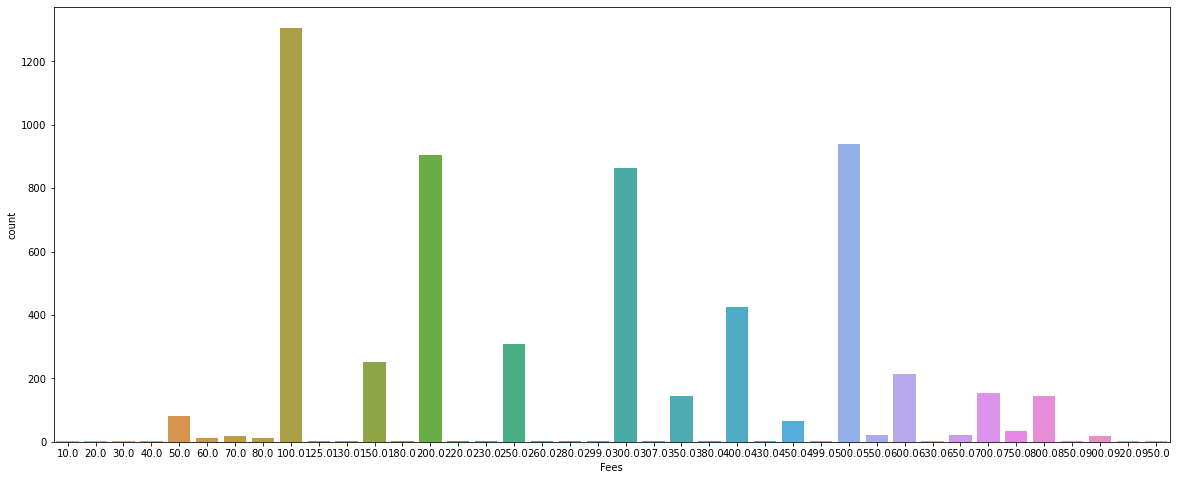

In [306]:
plt.subplots(figsize=(20,8))
sns.countplot(df.Fees)
plt.show()

Rs.100 is the most common consulation fees followed by 500, 200 and 300.

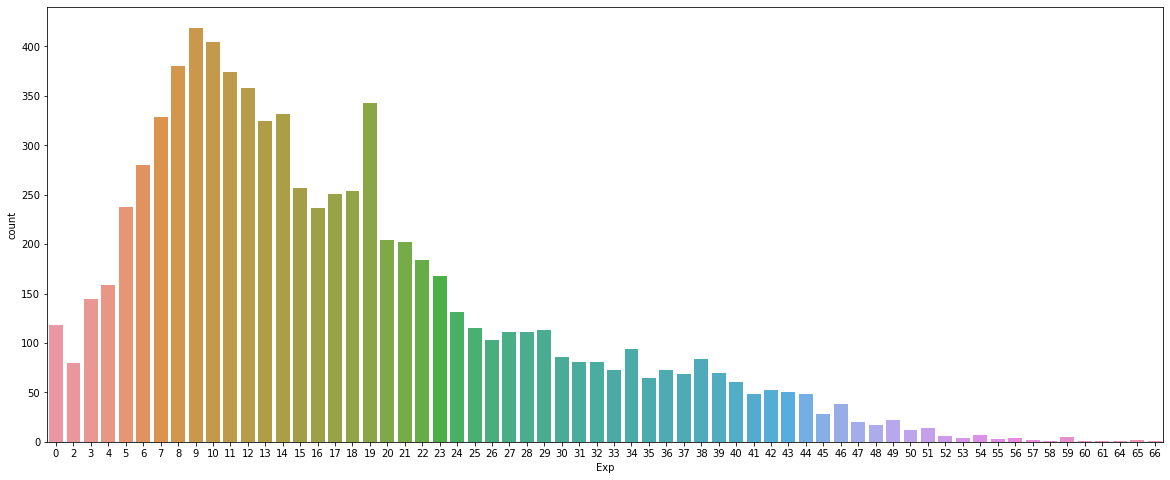

In [307]:
plt.subplots(figsize=(20,8))
sns.countplot(df.Exp)
plt.show()

Most of the doctots have experience from 6 to 20 years

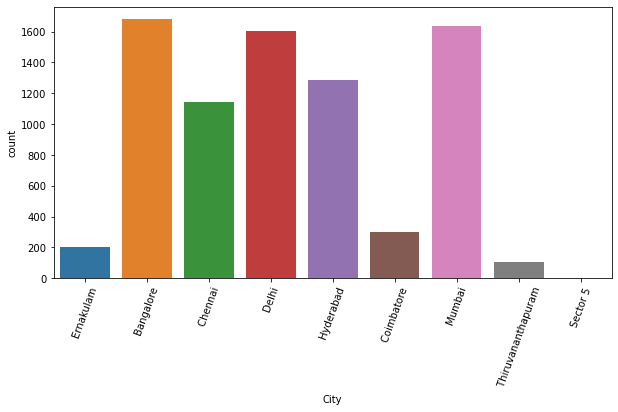

In [308]:
plt.subplots(figsize=(10,5))
sns.countplot(df.City)
plt.xticks(rotation=70)
plt.show()

Most of the doctors are from Bangalore Delhi and Mumbai.

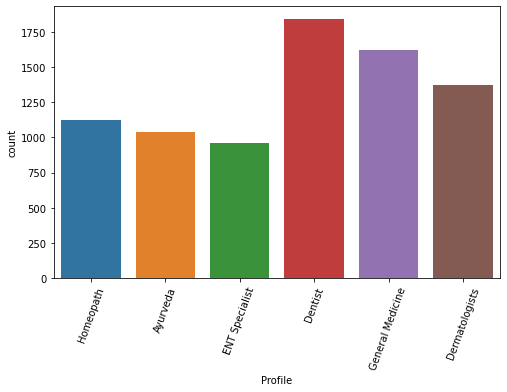

In [309]:
plt.subplots(figsize=(8,5))
sns.countplot(df.Profile)
plt.xticks(rotation=70)
plt.show()

Most of the doctors have Profile as Dentist, General Medicine and Dermatologists

<AxesSubplot:xlabel='Exp', ylabel='Fees'>

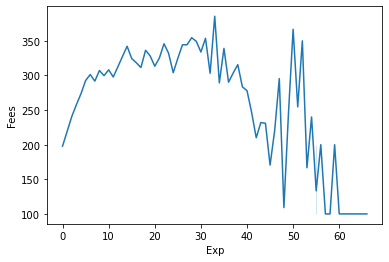

In [310]:
sns.lineplot(x='Exp',y='Fees',data=df)

Experience do not have much impact on the Fees.

<AxesSubplot:xlabel='Ratings', ylabel='Fees'>

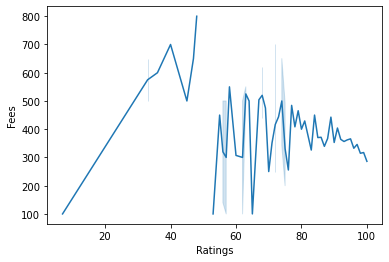

In [311]:
sns.lineplot(x='Ratings',y='Fees',data=df)

Rating also do not have any impact on the Fees

<AxesSubplot:xlabel='Ratings', ylabel='Fees'>

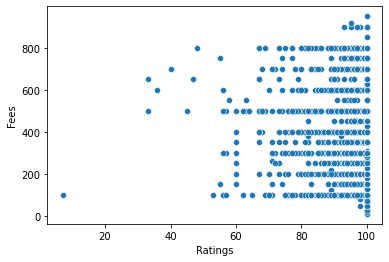

In [312]:
sns.scatterplot(y='Fees',x='Ratings',data=df)

Most of the rating is scattered between 60 to 80.

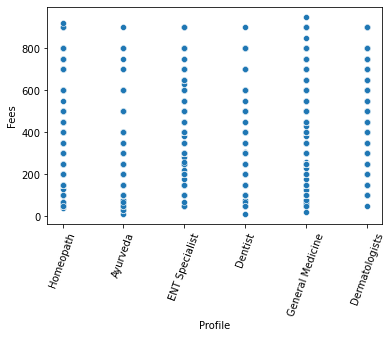

In [314]:
sns.scatterplot(y='Fees',x='Profile',data=df)
plt.xticks(rotation=70)
plt.show()

All profile has the same range of consultation fees

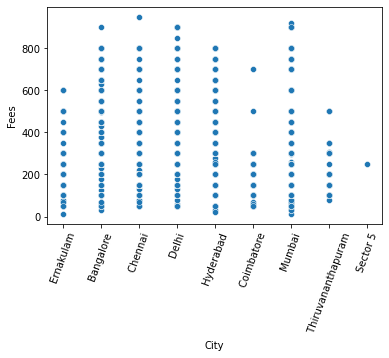

In [315]:
sns.scatterplot(y='Fees',x='City',data=df)
plt.xticks(rotation=70)
plt.show()

Chennai has the highest Consulation fees.

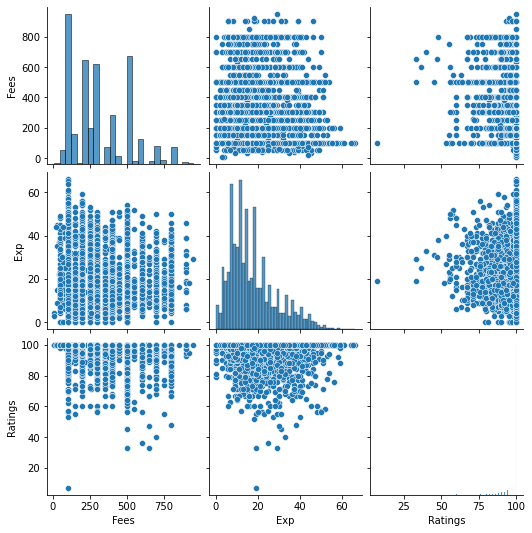

In [316]:
sns.pairplot(df)
plt.show()

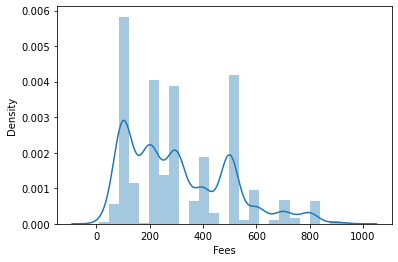

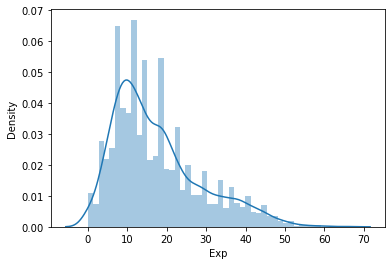

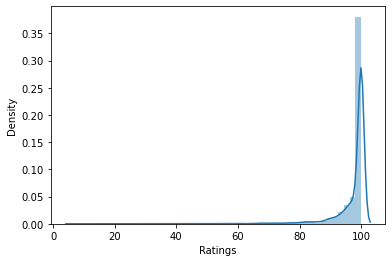

In [317]:
for i in df.columns:
    if df[i].dtypes!=object:
        sns.distplot(df[i]) 
        plt.show()

We can observe that Exp is right Skewed and Ratings is left skewed.

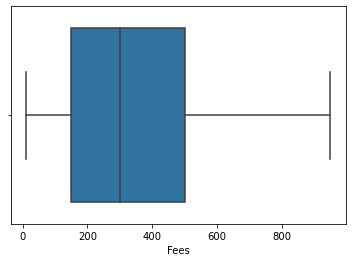

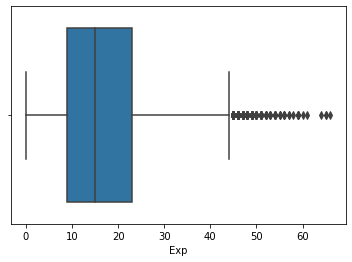

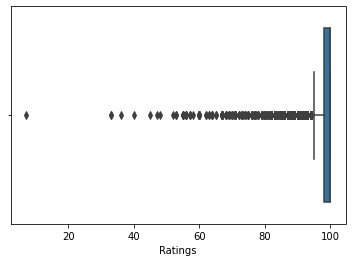

In [201]:
for i in df.columns:
    if df[i].dtypes!=object:
        sns.boxplot(df[i]) 
        plt.show()

There are outliers in rating. Let us check it out.

In [202]:
df[df['Ratings'] <20]

,Fees,Profile,Exp,Area,City,Degree1,Degree2,Ratings
2585,100.0,General Medicine,19,Pragathi Nagar,Hyderabad,MRCPCH (UK),MBBS,7


<AxesSubplot:xlabel='Ratings', ylabel='Density'>

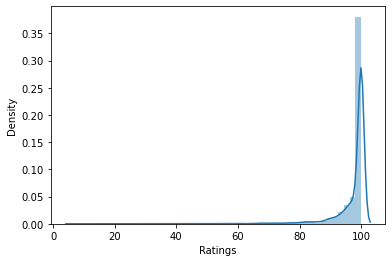

In [203]:
sns.distplot(df['Ratings'])

Since it only 1 rating with 7. I will change it with Median.

In [204]:
df["Ratings"].median()

100.0

In [205]:
df.loc[(df['Ratings']==7), 'Ratings']=100

In [206]:
df[df['Ratings'] <20]

,Fees,Profile,Exp,Area,City,Degree1,Degree2,Ratings


Done!!

Lets check the skewness.

In [210]:
df.skew()

Fees       0.752221
Exp        0.073710
Ratings   -4.217979
dtype: float64

We will remove the skew from Exp using square root method. 

In [208]:
df['Exp']=np.sqrt(df['Exp'])

In [211]:
from scipy.stats import boxcox

We will be removing skew on Ratings using boxcox method

In [212]:
ds=df

In [213]:
bc, var=boxcox(ds['Ratings'])

In [214]:
df['Ratings'],var=boxcox(ds['Ratings'])

In [215]:
df['Ratings'].skew()

-1.1427493975455187

In [216]:
df.skew()

Fees       0.752221
Exp        0.073710
Ratings   -1.142749
dtype: float64

Other methods were not working effectively for skew

In [217]:
df

,Fees,Profile,Exp,Area,City,Degree1,Degree2,Ratings
0,100.0,Homeopath,4.898979,Kakkanad,Ernakulam,BHMS,MD - Homeopathy,7.726388e+53
1,350.0,Ayurveda,3.464102,Whitefield,Bangalore,BAMS,MD - Ayurveda Medicine,4.418209e+53
2,300.0,ENT Specialist,3.000000,Mathikere - BEL,Bangalore,MBBS,MS - Otorhinolaryngology,7.726388e+53
3,250.0,Ayurveda,3.464102,Bannerghatta Road,Bangalore,BSc - Zoology,BAMS,7.726388e+53
4,250.0,Ayurveda,4.472136,Keelkattalai,Chennai,BAMS,Others,7.726388e+53
...,...,...,...,...,...,...,...,...
1982,NaN,Ayurveda,3.162278,Basavanagudi,Bangalore,BAMS,Doctor of Medicine,7.726388e+53
1983,NaN,Dermatologists,2.000000,Choolai,Chennai,MD - Dermatology,Venereology & Leprosy,7.726388e+53
1984,NaN,General Medicine,3.000000,Porur,Chennai,MBBS,MD / MS - Obstetrics & Gynaecology,7.726388e+53
1985,NaN,Dentist,3.464102,Arekere,Bangalore,BDS,Others,4.418209e+53


Lets create the instance for Object data type. We will use the same for changing the categorical data to numerical.

In [218]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [219]:
columns=['Profile','Area','City','Degree1','Degree2']

for i in columns:
    df[i]=le.fit_transform(df[i])

In [220]:
df

,Fees,Profile,Exp,Area,City,Degree1,Degree2,Ratings
0,100.0,5,4.898979,324,4,8,293,7.726388e+53
1,350.0,0,3.464102,925,0,5,282,4.418209e+53
2,300.0,3,3.000000,494,0,101,383,7.726388e+53
3,250.0,0,3.464102,74,0,14,10,7.726388e+53
4,250.0,0,4.472136,367,1,5,494,7.726388e+53
...,...,...,...,...,...,...,...,...
1982,NaN,0,3.162278,76,0,5,180,7.726388e+53
1983,NaN,2,2.000000,135,1,111,491,7.726388e+53
1984,NaN,4,3.000000,658,1,101,323,7.726388e+53
1985,NaN,1,3.464102,34,0,6,494,4.418209e+53


Let's split the data into input and target variable

In [221]:
x=df.drop(['Fees'],axis=1)
y=df['Fees']
y=pd.DataFrame(data=y)

We will drop the NaN values from y as null value was because of merging of test data

In [222]:
y.dropna(how='all',axis=0,inplace=True)

In [223]:
y

,Fees
0,100.0
1,350.0
2,300.0
3,250.0
4,250.0
...,...
5956,300.0
5957,100.0
5958,600.0
5959,100.0


Before fitting our model, first we will bring the data to common scale using Standard Scaler

In [224]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x=sc.fit_transform(x)
sc_x=pd.DataFrame(sc_x,columns=x.columns)

In [225]:
sc_x

,Profile,Exp,Area,City,Degree1,Degree2,Ratings
0,1.533628,0.698455,-0.436426,0.400034,-1.041178,-0.257438,0.644925
1,-1.483669,-0.357106,1.723004,-1.327469,-1.100764,-0.329655,-0.568815
2,0.326709,-0.698520,0.174395,-1.327469,0.805997,0.333428,0.644925
3,-1.483669,-0.357106,-1.334691,-1.327469,-0.922005,-2.115386,0.644925
4,-1.483669,0.384450,-0.281924,-0.895594,-1.100764,1.062164,0.644925
...,...,...,...,...,...,...,...
7943,-1.483669,-0.579141,-1.327505,-1.327469,-1.100764,-0.999304,0.644925
7944,-0.276750,-1.434165,-1.115514,-0.895594,1.004617,1.042468,0.644925
7945,0.930169,-0.698520,0.763657,-0.895594,0.805997,-0.060483,0.644925
7946,-0.880209,-0.357106,-1.478414,-1.327469,-1.080902,1.062164,-0.568815


We will now seperate the test data from above

In [226]:
df_test=sc_x[5961:]

In [227]:
df_test

,Profile,Exp,Area,City,Degree1,Degree2,Ratings
5961,0.930169,1.446680,-0.820883,1.263786,0.805997,1.062164,0.644925
5962,0.326709,1.190443,1.715818,0.831910,0.805997,-1.137173,0.644925
5963,-0.276750,1.747173,-0.472356,-0.895594,0.805997,-1.754300,-2.189669
5964,-1.483669,-2.905456,0.458246,-0.031842,-1.100764,1.062164,0.644925
5965,-0.880209,0.037125,-0.378937,-1.327469,-1.080902,-0.027657,0.644925
...,...,...,...,...,...,...,...
7943,-1.483669,-0.579141,-1.327505,-1.327469,-1.100764,-0.999304,0.644925
7944,-0.276750,-1.434165,-1.115514,-0.895594,1.004617,1.042468,0.644925
7945,0.930169,-0.698520,0.763657,-0.895594,0.805997,-0.060483,0.644925
7946,-0.880209,-0.357106,-1.478414,-1.327469,-1.080902,1.062164,-0.568815


We will also take the train data from sc_x

In [228]:
x=sc_x[0:5961]

In [229]:
x

,Profile,Exp,Area,City,Degree1,Degree2,Ratings
0,1.533628,0.698455,-0.436426,0.400034,-1.041178,-0.257438,0.644925
1,-1.483669,-0.357106,1.723004,-1.327469,-1.100764,-0.329655,-0.568815
2,0.326709,-0.698520,0.174395,-1.327469,0.805997,0.333428,0.644925
3,-1.483669,-0.357106,-1.334691,-1.327469,-0.922005,-2.115386,0.644925
4,-1.483669,0.384450,-0.281924,-0.895594,-1.100764,1.062164,0.644925
...,...,...,...,...,...,...,...
5956,0.326709,0.301147,-1.327505,-1.327469,0.805997,0.287472,-0.568815
5957,0.930169,1.320504,0.494177,-0.895594,0.805997,1.062164,0.644925
5958,0.930169,1.804972,-0.763394,-0.031842,0.805997,1.062164,-0.969270
5959,0.930169,-0.056314,1.661922,1.263786,0.805997,-0.277134,-2.036130


In [230]:
x.shape, y.shape

((5961, 7), (5961, 1))

We have now seperated the train and test data. Lets move forward for model fitting.

### Model Fitting and Selection

Let's import the necessary Regression libraries for model fitting.

In [231]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

We will use Linear regression model to check for the best random state to fit our training and test data.

In [232]:
MaX_r2_score=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.20,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    r2_scores = r2_score(y_test,y_pred)
    if r2_scores>MaX_r2_score:
        MaX_r2_score = r2_scores
        random_state = i
    
print("MaX R2 score corresponding to random state",random_state,"is",MaX_r2_score)

MaX R2 score corresponding to random state 125 is 0.12781008244217362


We will now split the data with the random_state 125 as that has given us the best accuracy.

#### Fitting the data to SupportVectorRegression model

In [233]:
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.06622807683795451
0.06199553190329132
0.07429552144017693


Kernel 'rbf' has given us the best output, hence we will select 'rbf' for testing the model

#### Fitting the data to various model and checking the accuracy

In [235]:
sv=SVR(kernel='rbf')
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
kn=KNeighborsRegressor()
ab=AdaBoostRegressor()
gb=GradientBoostingRegressor()
ls=Lasso()
rd=Ridge()

model=[lr,sv,dt,rf,kn,ab,gb,ls,rd]
kf = KFold(n_splits=5, random_state=54, shuffle=True)

train=[]
test=[]
Mse=[]
cv=[]

for m in model:
    m.fit(x_train,y_train)
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    train_score=r2_score(y_train,pred_train)
    train.append(train_score*100)
    test_score=r2_score(y_test,pred_test)
    test.append(test_score*100)
    mse = mean_squared_error(y_test,pred_test)
    Mse.append(mse)
    score=cross_val_score(m,x,y,cv=kf)
    cv.append(score.mean()*100)
    
Performance={'Model':['Linear Regression','SupportVector','DecisionTree','RandomForest','KNN','AdaBoost','GradientBoosting','Lasso','Ridge'],
             'Training Score':train,
            'Test Score':test,
            'Mean Square Error':Mse,
            'Cross Validation Score': cv}
Performance=pd.DataFrame(data=Performance)
Performance

,Model,Training Score,Test Score,Mean Square Error,Cross Validation Score
0,Linear Regression,10.025047,7.929108,31825.512246,9.102366
1,SupportVector,7.429552,4.402786,33044.431827,7.010248
2,DecisionTree,99.722754,-60.434605,55456.326907,-54.709936
3,RandomForest,88.595349,15.841361,29090.538360,17.925087
4,KNN,35.021730,-1.742579,35168.657938,1.210608
5,AdaBoost,13.700580,13.032000,30061.630666,10.850079
6,GradientBoosting,26.995596,22.041057,26947.531855,21.008408
7,Lasso,10.006808,7.978611,31808.401053,9.083582
8,Ridge,10.025047,7.929506,31825.374846,9.102444


##### The only model which has performed well is GradienBoosting model with the test accuracy of 22%, cross val scoer of 21%

We will select this as our final model and Hypertune it

### HyperTuning

In [236]:
from sklearn.model_selection import GridSearchCV

In [237]:
parameters = {'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    'max_depth':[3,5,8],
    'n_estimators':[100,200,300,500]}

In [238]:
GCV=GridSearchCV(GradientBoostingRegressor(),parameters,cv=3)
GCV.fit(x_train,y_train)

print(GCV.best_params_)

{'learning_rate': 0.025, 'max_depth': 5, 'n_estimators': 300}


In [239]:
Finalmod=GradientBoostingRegressor(learning_rate=0.025,max_depth=5,n_estimators=300)
Finalmod.fit(x_train,y_train)
pred_test=Finalmod.predict(x_test)
R2=r2_score(y_test,pred_test)
scores=cross_val_score(Finalmod,x,y,cv=kf)
MSE = mean_squared_error(y_test,pred_test)
print('GradientBoostingRegressor Performance')
print('---------------------------------------------------')
print('Accuracy Score', R2)
print('Cross Validation score',scores.mean())
print('Mean Square Error',MSE)

GradientBoostingRegressor Performance
---------------------------------------------------
Accuracy Score 0.2278233562697034
Cross Validation score 0.2216988810942683
Mean Square Error 26691.299211818838


##### The accuracy on test data has improved slightly from 22% with the Cross validation score of 22%.

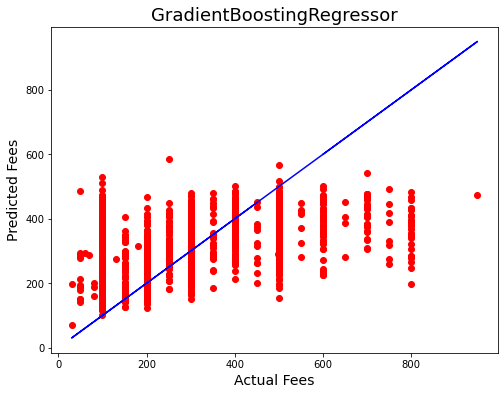

In [320]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Fees',fontsize=14)
plt.ylabel('Predicted Fees',fontsize=14)
plt.title('GradientBoostingRegressor',fontsize=18)
plt.show()

The model is not fitting that well.

Lets check the performance of the final model with test data.

In [240]:
test_data=Finalmod.predict(df_test)

In [241]:
test_data

array([262.58554175, 348.98579711, 352.8520055 , ..., 309.04859054,
       194.68126706, 345.70470783])

In [243]:
Fee=pd.DataFrame(data=test_data)

In [244]:
Fee

,0
0,262.585542
1,348.985797
2,352.852005
3,239.822044
4,255.779717
...,...
1982,230.404017
1983,390.081901
1984,309.048591
1985,194.681267


We are able to predict the fees from the test data.

Lets now save the model

In [319]:
import joblib
joblib.dump(Finalmod,'Doc_fees.obj')

['Doc_fees.obj']

### Completed